# FOODHUB FULL CODE PROJECT

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 


### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by * taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [1]:
# Importing of data manipulation and visualization libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read given data
data = pd.read_csv('foodhub_order.csv')

# Sample of dataset
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
# Question 1: How many rows and columns are present in the data? 

data.shape

(1898, 9)

In [4]:
# Observation: The foodhub dataset has 1898 rows and 9 columns

In [5]:
#Question 2: What are the datatypes of the different columns in the dataset?

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


* Observation: Of the 9 variables in the dataset, 4 are object datatype, 4 are integer datatype and just 1 is of float dtataype. They all have a non-null count meaning there are no missing values in any field.

In [7]:
# Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage?

data.restaurant_name = data.restaurant_name.astype('category')
data.cuisine_type = data.cuisine_type.astype('category')
data.day_of_the_week = data.day_of_the_week.astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


 * Observation: The variables 'restaurant_name', 'cuisine_type', and 'day_of_the_week' have been changed from 'object' to 'category' datatype. We see a drop in memory usage from 133.6+ KB to 102.7+ KB. Hence saving 30.9+ KB of memory

In [9]:
#Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

data.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


* Observations: The above displays the statistical summary of the data. We can infer that the minimum time it takes for food to be prepared once an order is placed is 20 minutes; The maximum time it takes is 35 minutes and it takes approximately 27.4 minutes on average to prepare food.

In [11]:
# Question 5: How many orders are not rated?

data.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

* Observations: Out of the 1898 possible submitted ratings, we see that 736 orders were not rated at all. The remaining 1162 orders received ratings ranging from 3 to 5. 

In [54]:
# Question 6: Explore all the variables and provide observations on their distributions.

# Order ID, Customer ID and Restaurant name

# Number of unique order IDs, customer IDs and restaurant names

print('Number of unique orders is:', data.order_id.nunique())
print('Number of unique customer IDs is:', data.customer_id.nunique())
print('Number of unique restaurants is:', data.restaurant_name.nunique())


Number of unique orders is: 1898
Number of unique customer IDs is: 1200
Number of unique restaurants is: 178


In [62]:
# Check top 5 customers and restaurants

data.customer_id.value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

In [64]:
data.restaurant_name.value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

* From the above analysis, we can conclude there are 1898 unique order IDs, 1200 unique customer IDs and 178 unique restaurants. Order and customer IDs are used for identification purposes. The top customer ID with the most orders is ID 52832 with 13 orders. The most ordered from restaurant is Shake Shack with a whopping 219 orders, about 40% more than the second highest restaurant with 132 orders. 

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

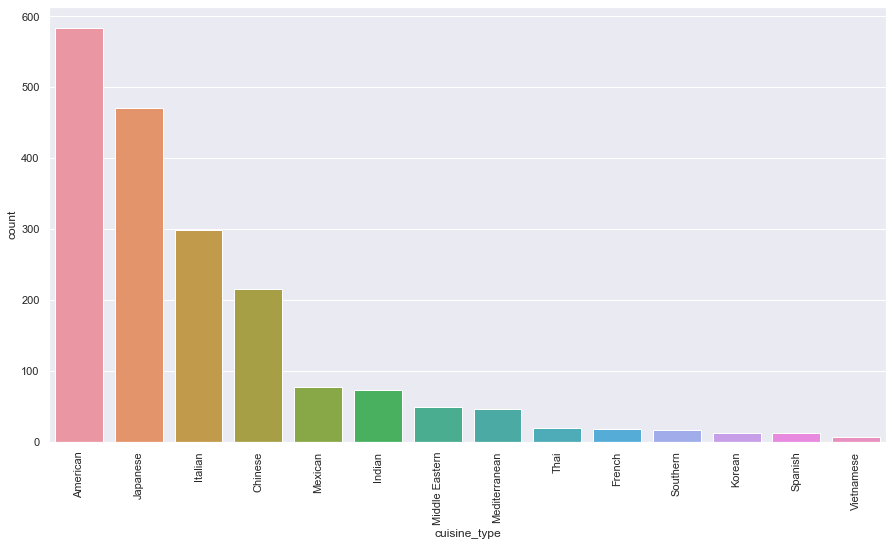

In [81]:
# Cuisine type
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(data=data, x='cuisine_type', order=data['cuisine_type'].value_counts().index)

* There are 14 distinct cuisine types. American is the most popularly ordered cuisine, followed by Japanese and Italian. The least ordered cuisine type is Vietnamese followed by Spanish.

<AxesSubplot:xlabel='cost_of_the_order', ylabel='Density'>

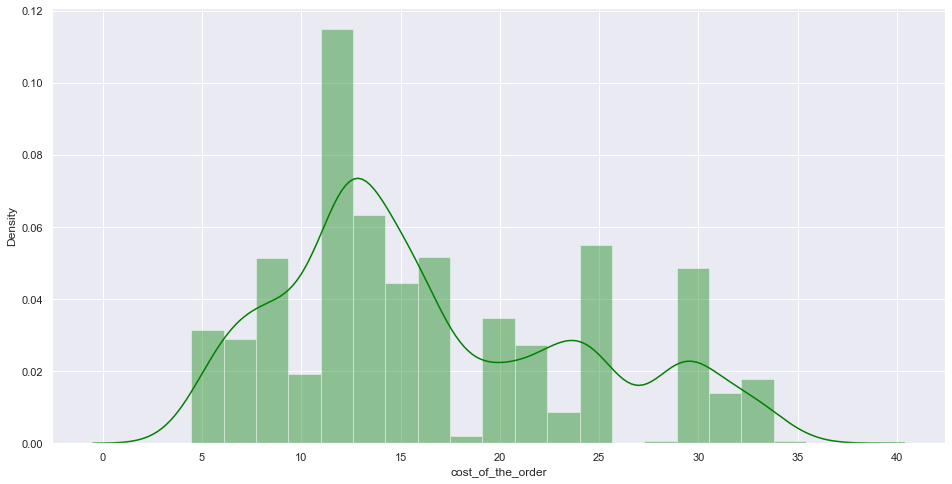

In [76]:
#Cost of the order
plt.figure(figsize=(16,8))
sns.distplot(data['cost_of_the_order'], color='green')

* The cost of order category does not follow a normal distribution with the highest number of orders between 12 dollars and 13 dollars  

<AxesSubplot:xlabel='rating', ylabel='count'>

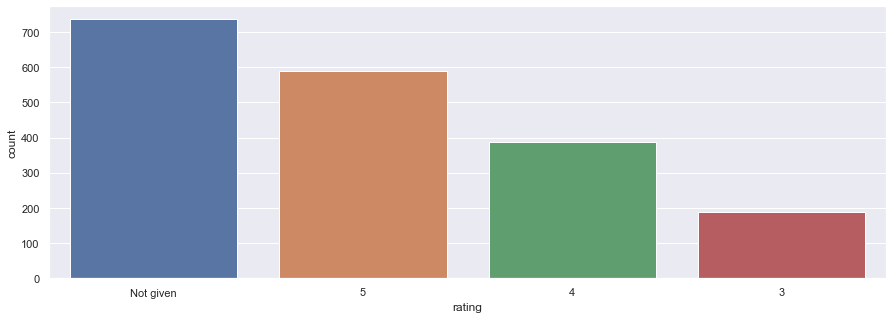

In [79]:
# Rating
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index)

* Observation: 736 Ratings not given were the hightest in the rating category, followed by a rating of 5 then a rating of 4, with 3 being the lowest.

In [78]:
# Food preparation time

data.food_preparation_time.mean()

27.371970495258168

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:xlabel='food_preparation_time'>

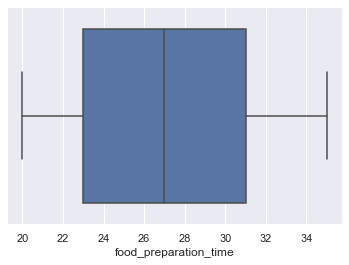

In [42]:
sns.boxplot(data=data, x='food_preparation_time')

* The median food preparation time is 27 minutes and is around the same value as the mean. The least being 20 minutes and a high of 35 minutes. A lower quartile of 23 minutes and upper quartile of 31 minutes, showing an even (symmetrical) spread from the median. 

In [43]:
# Delivery time

data.delivery_time.mean()

24.161749209694417

<AxesSubplot:xlabel='delivery_time'>

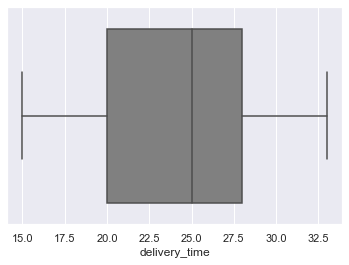

In [44]:
sns.boxplot(data=data, x='delivery_time', color='grey')

* The median delivery time is 25 minutes, which is just slightly higher than the mean, representing a left data skew. Also, from the boxplot we observe a chunk of the orders have delivery time between 15 and 25 minutes, with a min delivery time of 15 minutes and a max of around 34 minutes 

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

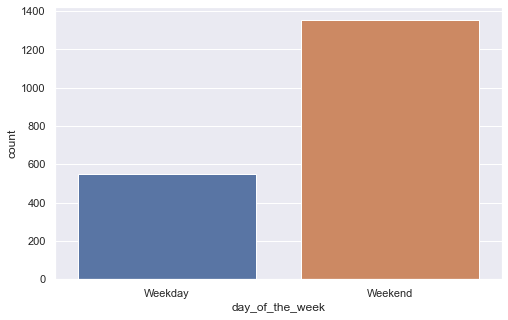

In [86]:
# Day of the week
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='day_of_the_week')

* The countplot above shows that most orders are made on the weekend, with over 1300 orders (About 70% of total orders) coming in on weekends and a little over 500 coming in on weekdays

In [14]:
# Question 7: Which are the top 5 restaurants in terms of the number of orders received?

data.restaurant_name.value_counts()[0:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

* The top 5 restaurants in terms of number of orders in descending order are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

In [16]:
# Question 8: Which is the most popular cuisine on weekends?

weekend_cuisine = data[data['day_of_the_week']=='Weekend']
weekend_cuisine.cuisine_type.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

* Observation: The most popular cuisine on weekends is American with a total of 415 orders.

In [18]:
# Question 9: What percentage of the orders cost more than 20 dollars?

over_20 = data[data['cost_of_the_order'] > 20]
print ('Total number of orders that cost above $20 is:', over_20.cost_of_the_order.shape[0])

Total number of orders that cost above $20 is: 555


In [19]:
percentage_over_20 = over_20.cost_of_the_order.shape[0]/data.shape[0]*100
print ('Percentage orders that cost above $20 is:', round(percentage_over_20, 1), '%')

Percentage orders that cost above $20 is: 29.2 %


In [20]:
# Question 10: What is the mean order delivery time?

t_mean = data.delivery_time.mean()
print('The mean order delivery time is approximately:', round(t_mean, 1), 'minutes')

The mean order delivery time is approximately: 24.2 minutes


In [21]:
# Question 11: The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed

data.customer_id.value_counts()[0:5]

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

* Top 5 customers with the above IDs will receive the 20% discount vouchers 

In [65]:
# Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<AxesSubplot:xlabel='cuisine_type', ylabel='cost_of_the_order'>

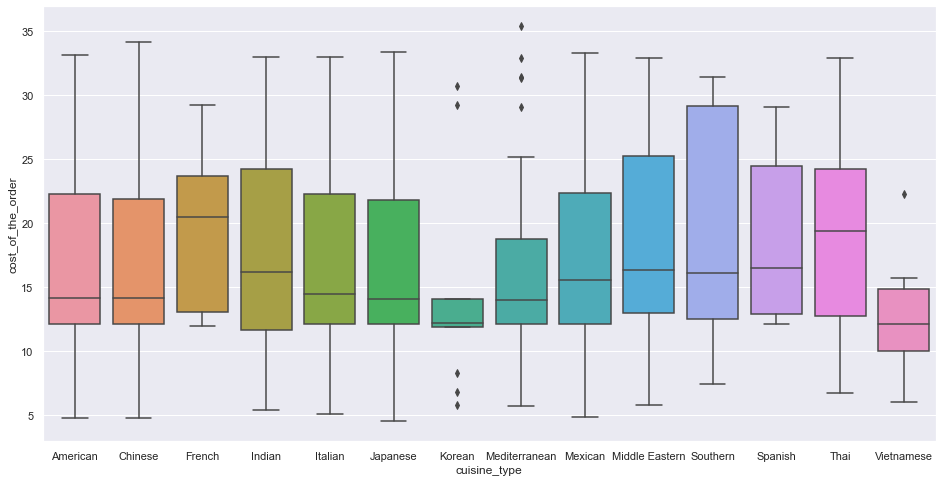

In [88]:
# Relationship between quisine type  & cost of order

plt.figure(figsize=(16,8))
sns.boxplot(data=data, x = 'cuisine_type', y = 'cost_of_the_order')

* Observations: The cheapest cuisines are Korean, Mediterranean and Vietnamese. At the same time, they are the only quisines with outliers. The highest cost of order is Mediterranean, which means it must have a dish that's very expensive.French and Spanish cuisines have the highest minimum cost, with all orders costing above $10. even though they have a minimum meal cost above $10 they do not have the most expensive orders. We also notice American, Chinese, Italian and Japanese quisines are similar in miminum, median and maximum costs.  

<AxesSubplot:xlabel='cuisine_type', ylabel='food_preparation_time'>

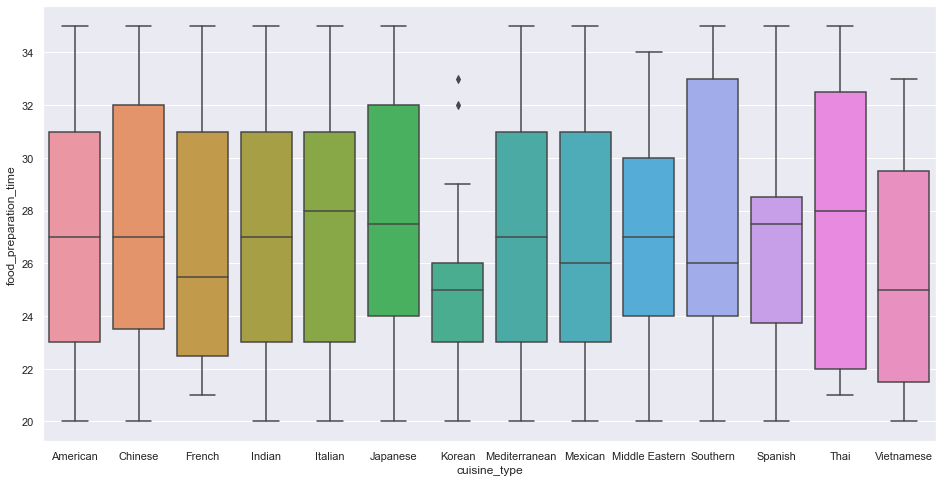

In [89]:
# Relationship between quisine & food preparation time

plt.figure(figsize=(16,8))
sns.boxplot(data=data, x = 'cuisine_type', y = 'food_preparation_time')

* Observations: Korean cuisine is the quicket to prepare compared to all the other cuisines, however with some 2 outliers. Food preparation time is fairly consistent across board, with median preparation time with the range of 24 to 30 minutes. All cuisines but French and Thai have meals that take a relatively lower 20 minutes to prepare.

<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

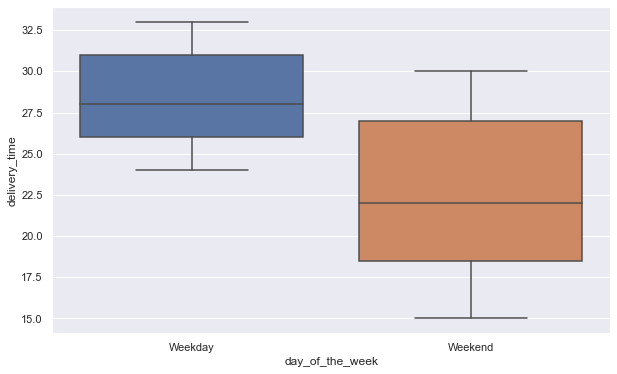

In [93]:
# Relationship between day of the week & delivery time

plt.figure(figsize=(10,6))
sns.boxplot(data=data, x = 'day_of_the_week', y = 'delivery_time')

* Observations: The delivery time on the weekends is lower than that of weekdays. The fastest weekend order is 15 minutes while that for weekday is around 24 minutes; a disparity of 9 minutes

<AxesSubplot:xlabel='rating', ylabel='delivery_time'>

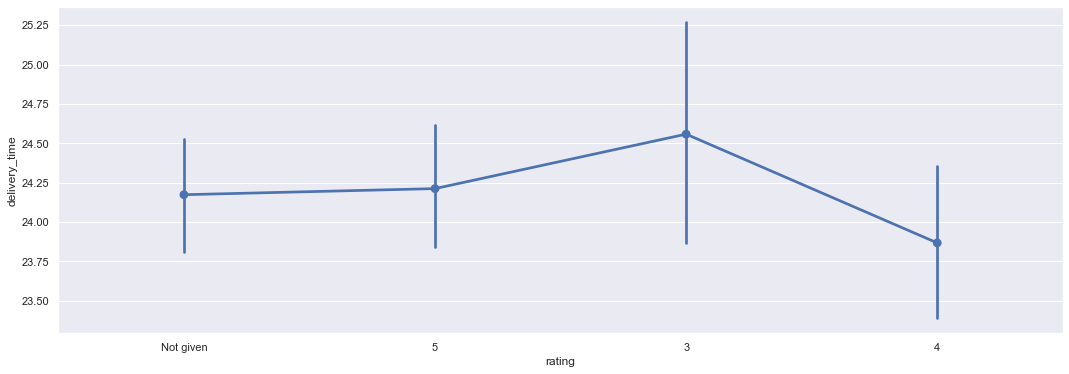

In [100]:
# Relationship between rating and delivery time
plt.figure(figsize=(18,6))
sns.pointplot(data=data, x = 'rating', y = 'delivery_time')

* Observation: We can't fully conclude that delivery time affects ratings since a 5 rating has a higher delivery time than a 4 rating. On the other hand a 5 rating has a lower delivery time than a 3 rating, making the analysis inconclusive

In [ ]:
# Relationship between rating and food preparation time 

<AxesSubplot:xlabel='rating', ylabel='food_preparation_time'>

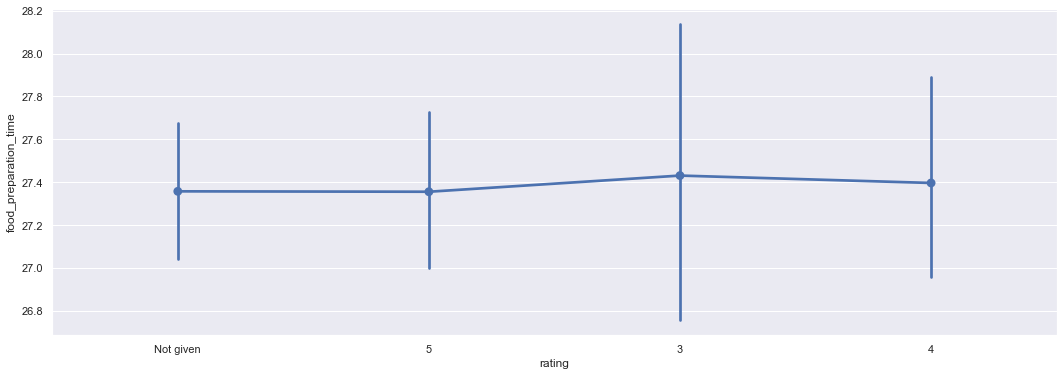

In [102]:
plt.figure(figsize=(18,6))
sns.pointplot(data=data, x = 'rating', y = 'food_preparation_time')

<AxesSubplot:xlabel='rating', ylabel='cost_of_the_order'>

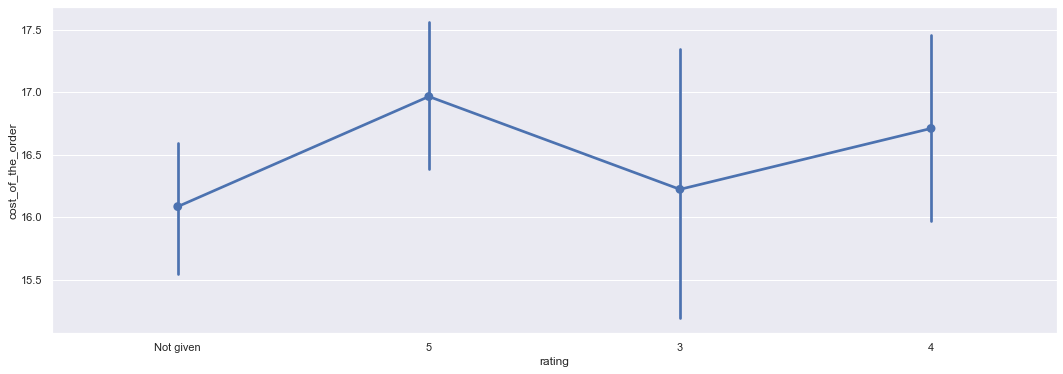

In [105]:
plt.figure(figsize=(18,6))
sns.pointplot(data=data, x = 'rating', y = 'cost_of_the_order')

* Observations: It can be observed that high order costs received a good rating while lower cost orders received lower rating. This possibly points to more expensive orders having higher recognition among customers.

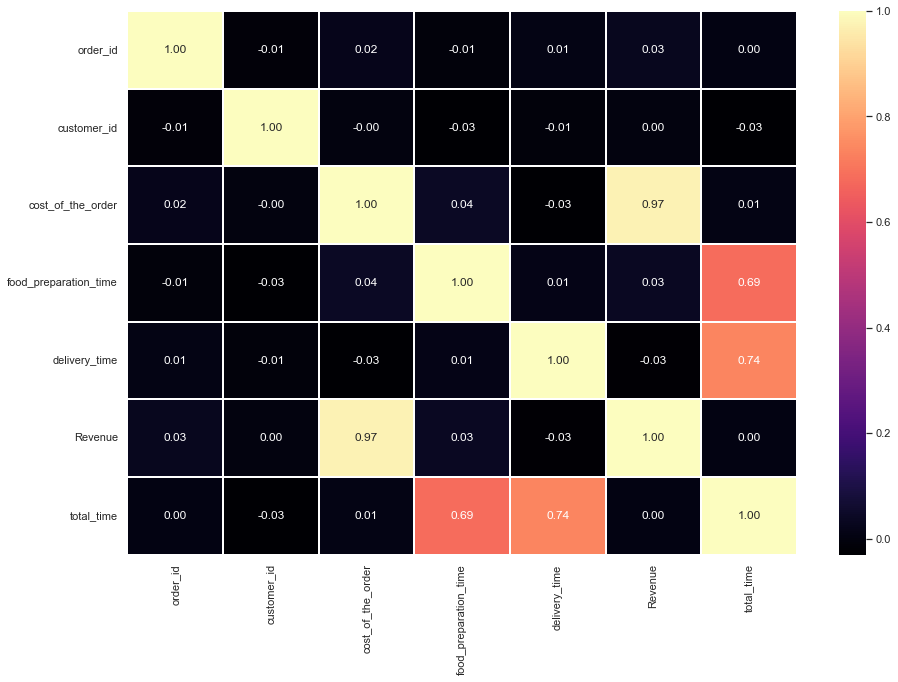

In [123]:
# Find correlation among all variables using heatmap
fig,ax = plt.subplots(figsize=(15, 10))   
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

* Observations: Looking at the variables previously analyzed, cost of order, delivery time and food preparation time, we see little to no correlation between these variables. All below 0.05 

* There's not much of a correlation between rating and food preparation time 

In [23]:
# Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

# Create new dataset with only restaurants which received actual ratings

data_rated = data[data.rating != 'Not given'].copy()

# Convert rating column in new dataset to integer datatype

data_rated.rating = data_rated.rating.astype('int')

# Take a look at new dataset info
data_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1162 non-null   int64   
 1   customer_id            1162 non-null   int64   
 2   restaurant_name        1162 non-null   category
 3   cuisine_type           1162 non-null   category
 4   cost_of_the_order      1162 non-null   float64 
 5   day_of_the_week        1162 non-null   category
 6   rating                 1162 non-null   int64   
 7   food_preparation_time  1162 non-null   int64   
 8   delivery_time          1162 non-null   int64   
dtypes: category(3), float64(1), int64(5)
memory usage: 74.3 KB


In [24]:
# Filter out 'restaurant_name' and 'rating' columns in 'data_rated' dataframe
rcounts = data_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
rcounts.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [25]:
# Find restaurants with rating count greater than 50
r50 = rcounts[rcounts['rating']>50]['restaurant_name']

# Find mean of ratings of all restaurants in 'data_rated' dataframe
mean_rating=data_rated.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()

# Cross reference 'mean_rating' dataset with 'r50' dataset to find restaurants with rating counts over 50 and mean rating greater than 4
mean_rating[mean_rating['restaurant_name'].isin(r50)]

,restaurant_name,rating
66,The Meatball Shop,4.511905
89,Blue Ribbon Fried Chicken,4.328125
93,Shake Shack,4.278195
101,Blue Ribbon Sushi,4.219178


* Observation: There are 4 restaurants that meet the criteria to win the promotional offer. They are; 'The Meatball Shop', 'Blue Ribbon Fried Chicken', 'Shake Shack' and 'Blue Ribbon Sushi'

In [27]:
# Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

# Define a function to calculate revenue
def new(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

data['Revenue'] = data.cost_of_the_order.apply(new)

# View sample of new dataframe
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [28]:
# Find sum of all revenue

net_revenue = data.Revenue.sum()
print('Net revenue generated by the company is approximately: $', round(net_revenue, 2))

Net revenue generated by the company is approximately: $ 6166.3


In [29]:
# Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.

# total time = prep time + delivery time
# Add total time column to dataset

data['total_time'] = data.food_preparation_time + data.delivery_time
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [30]:
over_60 = data[data['total_time'] > 60]
print ('Orders that take more than 60 mins total :', over_60.total_time.shape[0], 'orders')

Orders that take more than 60 mins total : 200 orders


In [31]:
percentage_over_60 = over_60.total_time.shape[0]/data.shape[0]*100
print ('Percentage of orders that take more than 60 mins total:', round(percentage_over_60, 1), '%')

Percentage of orders that take more than 60 mins total: 10.5 %


In [33]:
# Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

# Mean delivery time on weekdays
print('The mean delivery time on weekdays is about', 
      round(data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Mean delivery time on weekends 
print('The mean delivery time on weekends is about', 
      round(data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is about 28 minutes
The mean delivery time on weekends is about 22 minutes


<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

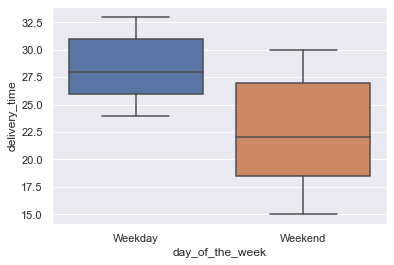

In [34]:
sns.boxplot(data=data, x='day_of_the_week', y='delivery_time' )

* The above boxplot also gives a visual confirmation that the mean delivery time on weekdays (28mins) is higher than the mean delivery time on weekends (22mins)

In [ ]:
# Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

* The Foodhub should keep up the incentive of promotional offers to the highest performing restaurants. This will serve as a great motivator for restaurants to provide top notch service for customers.We see from the plots above that delivery time on weekdays is not as good as on weekends. Providing incentives for delivery services on weekdays will provide a pathway for matching up to weekend delivery times. As customer rating could not be related to other variables to a high extent, ratings could be elaborated further to enable customers to provide further reasons why they chose a certain rating number to let businesses see where they could improve on to get better ratings. Finally, the Foodhub should collaborate with already high grossing restaurants to rake in more revenue as they have a high accpetance among customers and work with lower grossing restaurants to get their numbers up as this benefits all parties in the long run. 